**ebb** Tutorial
================

`ebb` is a python package for fluid flow calculations in pipes. 

Pipe flow has many known results. Circular pipes, pipes of various cross-sections, and orifi, all have well-understood equations that govern their behavior. They also tend to be tedious to calculate. 

- The units conversion can be diffucult.
- Non-circular cases may involve series solutions.
- The fluids involved have particular behavior that depends on temperature and pressure.

`ebb` is a backend to collect all of this information, so you can focus on what's important; designing fluidic systems.

In [1]:
import ebb

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import numpy as np

## Units

`ebb` uses `pint` as a backend for unit conversion. Simplifying unit relationships is critical because it's easy to make bookkeeping mistakes in fluid dynamics when considering viscosity and shear units.

`ebb` creates a `pint` UnitRegistry in the module `ebb.units`. This UnitRegistry should be used to create all of the Quantities used in `ebb` calculations, because mixing UnitRegistries can have unpredictable consequences.

In [2]:
from ebb.units import Quantity as Q

In [12]:
length = Q('1 m')
print(length.to('mm'))

1000.0 millimeter


`ebb` assumes SI units for all output. However, functions typically take strings as an input. When a string is supplied, it is converted to a `pint` Quantity of the appropriate units. `pint` Quantitiy objects can also be supplied directly as function inputs.

## Fluids
`ebb` includes a fluid library. So far, this library includes Water as an incompressible fluid, and several gasses as compressible fluids. These objects take care of calculating the intrinsic properties of the fluids involved at each temperature, pressure, and flow condition.

Each Fluid object is an immutable object with a series of class methods. Fluids cannot be instantiated, only subclassed. (In other words, there's no point in creating two objects representing water, because all water is the same!)

In [4]:
from ebb.fluids import Air, Water, Nitrogen, Oxygen, Helium

### Incompressable Fluids
So far, Water is the only incompressible fluid included in the library. Water has a density that depends on temperature but not pressure.

Fluids are required to have methods reporting their viscosity and their density.

<class 'ebb.fluids.Water.Water'>
0.8904389816146542 centipoise
0.6514278843596056 centipoise


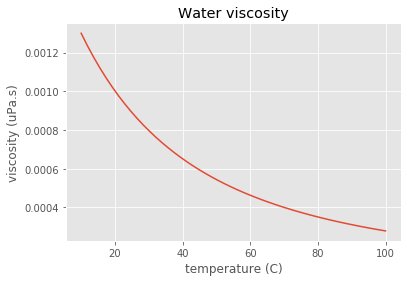

In [11]:
print(Water)
print(Water.viscosity().to('cpoise'))
print(Water.viscosity(temperature=40, pressure='1.1 bar').to('cpoise'))
temperature = np.linspace(10, 100)
viscosity = [Water.viscosity(t).m for t in temperature]
plt.plot(temperature, viscosity)
plt.xlabel('temperature (C)')
plt.ylabel('viscosity (uPa.s)')
plt.title('Water viscosity')
plt.show()

### Compressible Fluids
`ebb` also has a few compressible fluid models. These fluids change density with both pressure and temperature.

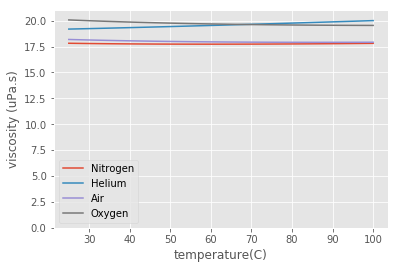

In [6]:
temperature = np.linspace(25, 100)
for fluid in Nitrogen, Helium, Air, Oxygen:
    viscosity = [fluid.viscosity(temperature=t).m for t in temperature]
    plt.plot(temperature, viscosity, label=fluid.__name__)
plt.xlabel('temperature(C)')
plt.ylabel('viscosity (uPa.s)')
plt.ylim([0, 21])
plt.legend()
plt.show()

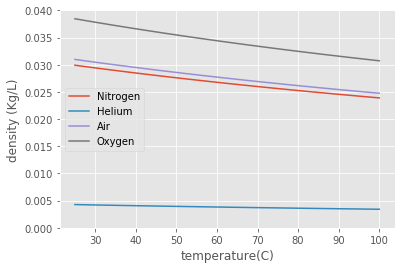

In [7]:
temperature = np.linspace(25, 100)
for fluid in Nitrogen, Helium, Air, Oxygen:
    density = [fluid.density(temperature=t).m for t in temperature]
    plt.plot(temperature, density, label=fluid.__name__)
plt.xlabel('temperature(C)')
plt.ylabel('density (Kg/L)')
plt.ylim([0, 0.04])
plt.legend()
plt.show()

## Pipes

Pipe objects are the representations of fluidic components in `ebb`. In this case, a pipe is any object through which fluid flow can be calculated.

In [8]:
from ebb.pipes import CircularPipe, RectangularPipe

### Circular Pipe
The simplest Pipe is a CircularPipe. A CircularPipe represents any cylindrical path for fluid flow; a straw, a blood vein, or a literal copper pipe.

A CircularPipe has two dimensions: the radius and the length.

CircularPipe(radius=<Quantity(0.001, 'meter')>, length=<Quantity(10, 'meter')>)
0.9476595391457666 meter / second


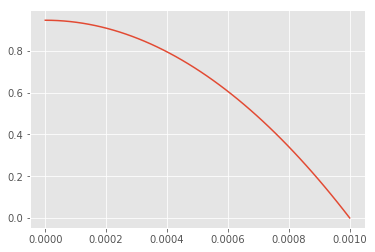

In [14]:
pipe = CircularPipe(radius=0.001, length=10)
print(pipe)
print(pipe.maximum_velocity(fluid=Air, pressure=Q('0.1 psi')))

radii = Q(np.linspace(0, .001), 'm')
v = [pipe.velocity(r, 0, fluid=Air, pressure=Q('0.1 psi')).m for r in radii]
plt.plot(radii, v)
plt.show()

### Other Pipes

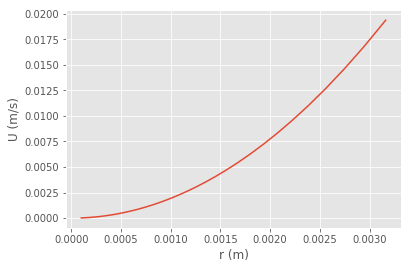

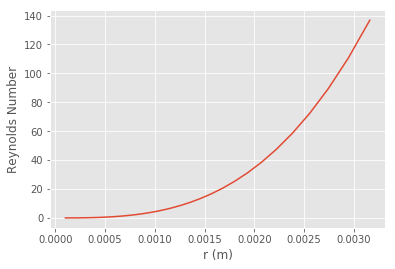

In [10]:
L = Q('1 m')

radii = Q(np.logspace(-4, -2.5), 'm')

velocities = []
reynolds = []

for r in radii:
    pipe = CircularPipe(r, L)
    velocities.append(pipe.maximum_velocity(fluid=Water, pressure=Q('0.001 psi')).m)
    reynolds.append(pipe.reynolds(fluid=Water, pressure=Q('0.001 psi')))
plt.plot(radii, velocities)
plt.xlabel('r (m)')
plt.ylabel('U (m/s)')
plt.show()
plt.plot(radii, reynolds)
plt.xlabel('r (m)')
plt.ylabel('Reynolds Number')
plt.show()